# Calibration of the SABR Volatility Model

Stochastic volatility models are those in which the variance of a stochastic process is itself randomly distributed. They are used in the field of mathematical finance to evaluate derivative securities, such as options. 
<br>
Stochastic volatility models are one approach to resolve a shortcoming of the Black–Scholes model. In particular, models based on Black-Scholes assume that the underlying volatility is constant over the life of the derivative, and unaffected by the changes in the price level of the underlying security. However, these models cannot explain long-observed features of the implied volatility surface such as volatility smile and skew, which indicate that implied volatility does tend to vary with respect to strike price and expiry. By assuming that the volatility of the underlying price is a stochastic process rather than a constant, it becomes possible to model derivatives more accurately. 

## Literature Overview

### Options

In finance, an **option** is a contract which gives the buyer the right, but not the obligation, to buy or sell an underlying asset or instrument at a specified **strike price**, $K$, prior to or on a specified date, depending on the form of the option. The strike price may be set by reference to the **spot price**, $S_t$, of the underlying security or commodity on the day an option is taken out, or it may be fixed at a **discount** or at a **premium**. The seller has the corresponding obligation to fulfill the transaction, to sell or buy, if the buyer "exercises" the option [**[1]**](https://en.wikipedia.org/wiki/Option). 

### Option Types

There are many different types of options that can be traded and these can be categorized in a number of ways. In a very broad sense, there are two main types: calls and puts. 
<br>
The table below provides a formal definition of the two option types.

|**Call Option**|**Put Option**|
|---------------|--------------|
|A **call option** is a financial contract between two parties, the buyer and the seller of this type of option. The buyer of the call option has the right, but not the obligation, to buy an agreed quantity of a particular commodity or financial instrument from the seller of the option at a certain time for a certain price. The seller is obligated to sell the commodity or financial instrument to the buyer if the buyer so decides. The buyer pays a fee for this right [**[2]**](https://en.wikipedia.org/wiki/Call_option).|A **put option** is a stock market device which gives the owner the right, but not the obligation, to sell an asset, at a specified price, by a predetermined date to a given party [**[3]**](https://en.wikipedia.org/wiki/Put_option).|

At time of maturity $T$, the payoff $C_T$ of a call option defined by a strike or exercise price $K$ is mathematically expressed as,

\begin{equation} \label{eq1}
\begin{split}
\left.
\begin{aligned}
   S_T - K \space \space \textrm{if} \space \space S_T \geq K \\
   0       \space \space \textrm{if} \space \space S_T \leq K
\end{aligned}
\right\} &= \textrm{max}\{S_T - K, 0\} = \left(S_T - K\right)^+
\end{split}
\end{equation} 

likewise, the payoff $P_{T}$ of a put option defined by a strike price $K$ is mathematically expressed as,

\begin{equation} \label{eq2}
\begin{split}
\left.
\begin{aligned}
   K - S_T \space \space \textrm{if} \space \space K \geq S_T \\
   0       \space \space \textrm{if} \space \space K \leq S_T
\end{aligned}
\right\} &= \textrm{max}\{K - S_T, 0\} = \left(K - S_T\right)^+
\end{split}
\end{equation} 

where $S_T$, in both cases, is the spot price of the underlying at time of maturity.

### Option Styles

In finance, the **style** of an option is the class into which the option falls, usually defined by the dates on which the option may be exercised. The vast majority of options are either **European** or **American** options. These options, as well as others where the payoff is calculated similarly, are referred to as "vanilla options." Options where the payoff is calculated differently are categorized as "exotic options." Exotic options can pose challenging problems in valuation and hedging [**[4]**](https://en.wikipedia.org/wiki/Option_style). 
<br>
Similarly, the table below provides a formal definition of the two option styles.

|**European Option**|**American Option**|
|---------------|--------------|
|A **European option** is a version of an options contract that limits execution to its expiration date. In other words, if the underlying security such as a stock has moved in price an investor would not be able to exercise the option early and take delivery of or sell the shares. Instead, the call or put action will only take place on the date of option maturity [**[5]**](https://www.investopedia.com/terms/e/europeanoption.asp).|An **American option** is a version of an options contract that allows holders to exercise the option rights at any time before and including the day of expiration [**[6]**](https://www.investopedia.com/terms/a/americanoption.asp).|

### Swaps

A **swap** is a derivative in which two counterparties exchange cash flows of one party's financial instrument for those of the other party's financial instrument. Swaps can be used to hedge certain risks such as interest rate risk, or to speculate on changes in the expected direction of underlying prices. Swaps were first introduced to the public in 1981 when IBM and the World Bank entered into a swap agreement. Today, swaps are among the most heavily traded financial contracts in the world: the total amount of interest rates and currency swaps outstanding was more than ${$}348$ trillion in 2010, according to Bank for International Settlements (BIS) [**[7]**](https://en.wikipedia.org/wiki/Swap).

### Swaptions

A **swaption** is an option granting its owner the right but not the obligation to enter into an underlying swap. Although options can be traded on a variety of swaps, the term "swaption" typically refers to options on interest rate swaps [**[8]**](https://en.wikipedia.org/wiki/Swaption).

### Swaption Types

There are two types of swaption contracts (analogous to put and call options),

|**Payer Swaption**|**Receiver Swaption**|
|---------------|--------------|
|A payer swaption gives the owner of the swaption the right to enter into a swap where they pay the fixed leg and receive the floating leg [**[9]**](https://en.wikipedia.org/wiki/Swaption).|A receiver swaption gives the owner of the swaption the right to enter into a swap in which they will receive the fixed leg, and pay the floating leg [**[10]**](https://en.wikipedia.org/wiki/Swaption).|

## Black Model

The **Black model** is a variant of the **Black–Scholes** option pricing model. Its primary applications are for pricing options on future contracts, bond options, Interest rate cap and floors, and swaptions. It was first presented in a paper written by **Fischer Black** in 1976 [**[11]**](https://en.wikipedia.org/wiki/Black_model).

## Black Formula

The **Black formula** is similar to the Black–Scholes formula for valuing stock options except that the spot price, $S$, of the underlying is replaced by a discounted futures price $F$ [**[12]**](https://en.wikipedia.org/wiki/Black_model).

Suppose there is constant risk-free interest rate $r$ and the futures price $F(t)$ of a particular underlying is log-normal with constant volatility $\sigma$. Then the Black formula states the price for a European call option of maturity $T$ on a futures contract with strike price $K$ and delivery date $T'$ (with $T'\geq T$) is,

$$C(F, K, T) = \mathrm{e}^{{-rT}}[FN(\mathrm{d}_{1})-KN(\mathrm{d}_{2})]$$

the corresponding put price is,

$$P(F, K, T) = \mathrm{e}^{{-rT}}[KN(-\mathrm{d}_{2})-FN(-\mathrm{d}_{1})]$$

where,

$\space \space \space \space {\begin{aligned}&N(x)={\frac {1}{2}}\left[1+\operatorname {erf} \left({\frac {x}{\sqrt {2}}}\right)\right]\\&\mathrm{d}_{1}=\frac{\mathrm{log}{\frac{F}{K}}+\frac{\sigma^2}{2}T}{\sigma \sqrt{N}}\\&\mathrm{d}_{2}=\frac{\mathrm{log}{\frac{F}{K}}-\frac{\sigma^2}{2}T}{\sigma \sqrt{N}}=\mathrm{d_1}-\sigma\sqrt{T}\end{aligned}}$

## Implied Volatility

The Black-Scholes model is an elegant model but it does not perform very well in practice. For example, it is well known that stock prices jump on occasions and do not always move in the smooth manner predicted by the Geometric Brownian Motion model. Stock prices also tend to have fatter tails than those predicted by Geometric Brownian Motion. The **volatility surface** is a function of strike, $K$, and time-to-maturity, $T$, and is defined implicitly,

$$C_{mkt}(S, K, T) = C_{\mathcal{BS}}(S, T, r, K, \sigma(K, T))$$

where $C_{mkt}(S, K, T)$ denotes the current market price of a call option with time-to-maturity $T$, and strike $K$, and $C_{\mathcal{BS}}(S, T, r, K, \sigma(K, T))$ is the Black-Scholes formula for pricing a call option. In other words, $\sigma(K, T)$ is the volatility that, when substituted into the Black-Scholes formula, gives the market price, $C_{mkt}(S, K, T)$. Because the Black-Scholes formula is continuous and increasing in $\sigma$, there will always be a unique solution, $\sigma(K, T)$. If the Black-Scholes model were correct then the volatility surface would be **flat** with $\sigma(K, T) = \sigma$ for all $K$ and $T$ . In practice, however, not only is the volatility surface not flat but it actually varies, often significantly, with time.

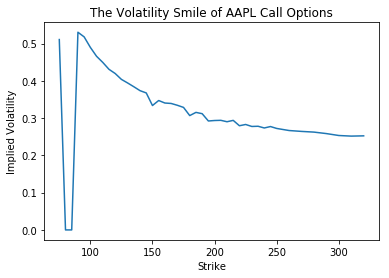

In [1]:
# Scientific libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

# AAPL call options
AAPL = yf.Ticker("AAPL")
opt = AAPL.option_chain('2021-06-18')
opt.calls.head()

# Visulization
plt.plot(opt.calls['strike'], opt.calls['impliedVolatility'])
plt.xlabel("Strike")
plt.ylabel("Implied Volatility")
plt.title("The Volatility Smile of AAPL Call Options")
plt.show()

**Volatility smiles** are implied volatility patterns that arise in pricing financial options. It corresponds to finding one single parameter (implied volatility) that is needed to be modified for the Black–Scholes formula to fit market prices.

## SABR Volatility Model

The **SABR volatility model** of Hagan et al. [**[13]**](http://web.math.ku.dk/~rolf/SABR.pdf) is described by the following 3 stochastic differential equations,

\begin{align}
&\mathrm{d}F_{t} = \alpha _{t}F_{t}^{\beta }\mathrm{d}W_{t} \\ 
&\mathrm{d}\alpha _{t} = \nu \alpha _{t}^{{}}\mathrm{d}Z_{t} \\ 
&\mathrm{d}W_{t}\mathrm{d}Z_{t} = \rho \mathrm{d}t
\end{align}

with initial values $F_0$ and $\alpha= \alpha_0$. In these equations, $F_t$ is the forward rate, $\alpha_t$ is the volatility, and $W_t$ and $Z_t$ are two correlated **Wiener processes** with correlation coefficient $− 1 \leq \rho \leq 1$. The parameters are,

$\space \space \space \space \alpha$: The initial volatility, with $\alpha \geq 0$.
<br><br>
$\space \space \space \space \nu$: The volatility of the volatility, with $\nu \geq 0$.
<br><br>
$\space \space \space \space \beta$: The exponent for the forward rate, with $0\leq \beta \leq 1$.
<br><br>
$\space \space \space \space \rho$: The correlation between the Wiener processes.

The case $\beta = 0$ produces the **stochastic normal model**, $\beta = 1$ produces the **stochastic lognormal model**, and $\beta = \frac{1}{2}$ produces the stochastic **Cox–Ingersoll–Ross model model**.

The prices of European call options in the SABR model are given by Black’s model. For a current forward rate $F$, strike $K$, and implied volatility $\sigma_B$ the price of a European call option with maturity $T$, is,

$$C_B(F, K, \sigma_B, T) = \mathrm{e}^{{-rT}}[FN(\mathrm{d}_{1})-KN(\mathrm{d}_{2})]$$

with,

$$\mathrm{d}_{1}=\frac{\mathrm{log}{\frac{F}{K}}\pm\frac{\sigma^2}{2}T}{\sigma \sqrt{N}}$$

and analogously for a European put option. The volatility parameter $\sigma_B$ is provided by the SABR model. With estimates of $\alpha$, $\beta$, $\nu$, and $\rho$, the implied volatility is,

\begin{align}
\sigma_B \left(K, F\right) &= \frac{\alpha \left( 1 + \left( \frac{\left(1 - \beta\right)^2}{24} \frac{\alpha^2}{\left(F K\right)^{1-\beta}} + \frac{1}{4} \frac{\rho \beta \alpha v}{\left(F K\right)^\frac{1 - \beta}{2}} + \frac{2 - 3 \rho^2}{24} v^2\right) T \right)}{\left(F K\right)^{\frac{1-\beta}{2}} \left(1 + \frac{\left(1 - \beta\right)^2}{24} \log^2 \frac{F}{K} + \frac{\left(1 - \beta\right)^4}{1920} \log^4 \frac{F}{K}\right)} \frac{z}{\chi\left(z\right)} \\
z &= \frac{v}{\alpha} \left(F K\right)^{\frac{1 - \beta}{2}} \log \frac{F}{K} \\
\chi\left(z\right) &= \log \left(\frac{\sqrt{1 - 2\rho z + z^2} + z - \rho}{1 - \rho}\right)
\end{align}

Once the parameters $\alpha$, $\beta$, $\nu$, and $\rho$ are estimated, the implied volatility $\sigma_B$ is a function only of the forward price $F$ and the strike $K$.

## Parametric Estimation

The $\beta$ parameter is estimated first, and is not very important in the model because the choice of $\beta$ does not greatly affect the shape of the volatility curve. With $\beta$ estimated, there are two possible choices for estimating the remaining parameters,

- estimate $\alpha$, $\rho$, and $\nu$ directly, or,
<br><br>
- estimate $\rho$ and $\nu$ directly, and infer $\alpha$ from $\rho$ and $\nu$, and at-the-money volatility, $\sigma_{ATM}$.

### $\beta$ Estimation

The at-the-money volatility $\sigma_{ATM}$ is obtained by setting $F = K$ in $\sigma_B \left(K, F\right)$, which produces,

$${{\sigma }_{ATM}}=\frac{\alpha \left( 1+\left( \frac{{{(1-\beta )}^{2}}}{24}\times \frac{{{\alpha }^{2}}}{{{F}^{2-2\beta }}}+\frac{1}{4}\frac{\rho \beta \alpha v }{{{F}^{1-\beta }}}+\frac{2-3{{\rho }^{2}}}{24}{{v}^{2}} \right) T \right)}{{{F}^{1-\beta }}}$$

taking logs produces,

$$\log {{\sigma }_{ATM}}\approx \log \alpha -(1-\beta )\log F$$

hence, $\beta$ can be estimated by a linear regression on a time series of logs of ATM volatilities and logs of forward rates. Alternatively, $\beta$ can be chosen from prior beliefs about which model (stochastic normal, lognormal, or CIR) is appropriate. In practice, the choice of $\beta$ has little effect on the resulting shape
of the volatility curve produced by the SABR model, so the choice of is not crucial. The choice of $\beta$, however, can affect the Greeks. 

### $\alpha$, $\rho$, and $\nu$ Estimation

Once $\widehat{\beta}$ is set, it remains to estimate $\alpha$, $\rho$, and $\nu$. This can be accomplished by minimizing the errors between the model and market volatilities $\sigma^{\mathrm{mkt}}_i$ with identical maturity $T$.. Hence, for
example, we can use $\mathrm{SSE}$, which produces,

$$\left(\widehat{\alpha },\widehat{\rho },\widehat{v}\right)= \underset{\alpha ,\rho ,v}{\mathrm{\arg \min }}\$$

We then use $\alpha$, $\beta$, $\rho$ and $\nu$ to obtain $\sigma_B$ and plug $\sigma_B$ into Black’s formula to get the call price.

## Illustration

We illustrate the SABR model under earlier parameterization by reproducing the below plot of Hagan et al. based on hypothetical market data [**[14]**](https://www.mathworks.com/help/fininst/calibrating-the-sabr-model.html). We use $\beta = 0.5$ and fit the SABR model using the earlier estimation approach. This appears in the below plot,

/home/jax/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


Optimization terminated successfully.
         Current function value: 0.000128
         Iterations: 109
         Function evaluations: 175


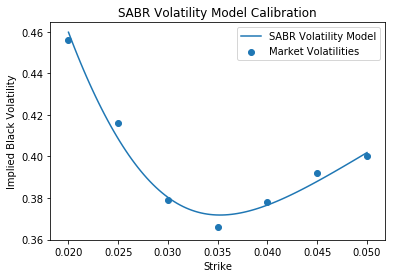

In [2]:
from mystic.solvers import fmin

# SABR volatility model
def SABR(x, beta, T, F, K):
    
    z = (x[2]/x[0]) * ((F*K)**((1-beta)/2)) * np.log(F/K)
    X_z = np.log((np.sqrt(1-2*x[1]*z+z**2)+z-x[1])/(1-x[1]))
    sigmaB = (x[0]*(1+((((1-beta)**2)/24)*((x[0]**2)/((F*K)**(1-beta)))+
             (1/4)*((x[1]*beta*x[2]*x[0])/((F*K)**((1-beta)/2)))
             +((2-3*x[1]**2)/24)*x[2]**2)*T))/(((F*K)**((1-beta)/2))*(1+
             ((((1-beta)**2)/24)*np.log(F/K)**2)+(((1-beta)**4)/1920)*np.log(F/K)**4))*(z/X_z)
    sigmaATM = x[0]*(1+((((1-beta)**2)/24)*((x[0]**2)/(F**(2-2*beta)))+(1/4)*((x[1]*beta*x[2]*x[0])/(F**(1-beta)))+
               (((2-3*x[1]**2)/24)*x[2]**2))*T)/(F**(1-beta))
    
    return np.where(K == F, sigmaATM, sigmaB)

# Objective function and bounds
obj = lambda x: np.sum((MarketVolatilities - SABR(x, beta, T, F, K))**2)
bnds = ((0,None) , (-1,1) , (0,None))

# Parameters
x0 =  np.array([0.5, 0, 5])
T = 3
beta = 0.5
F = 0.035
K = np.array([2.0, 2.5, 3, 3.5, 4.0, 4.5, 5.0])/100
MarketVolatilities = np.array([45.6, 41.6, 37.9, 36.6, 37.8, 39.2, 40.0])/100

# Optimization
x = fmin(obj, x0, bounds=bnds)
Kprime = np.linspace(2.0, 5.0, 100)/100

plt.plot(Kprime, SABR(x, beta, T, F, Kprime), label="SABR Volatility Model")
plt.scatter(K, MarketVolatilities, label="Market Volatilities")
plt.xlabel("Strike")
plt.ylabel("Implied Black Volatility")
plt.title("SABR Volatility Model Calibration")
plt.legend()
plt.show()

The figure shows that the $\mathrm{SSE}$ method produces a set of implied volatilities that fit the market volatilities
reasonably well.
<br>
the parameters of our model, thus, are,

|$\alpha$|$\beta$|$\rho$|$\nu$|
|---------------|--------------|---------------|--------------|
|$0.0602$|$0.5$|$0.2097$|$0.7509$|

## Bibliogarphy

- **[1]** https://en.wikipedia.org/wiki/Option
- **[2]** https://en.wikipedia.org/wiki/Call_option
- **[3]** https://en.wikipedia.org/wiki/Put_option
- **[4]** https://en.wikipedia.org/wiki/Option_style
- **[5]** https://www.investopedia.com/terms/e/europeanoption.asp
- **[6]** https://www.investopedia.com/terms/a/americanoption.asp
- **[7]** https://en.wikipedia.org/wiki/Swap
- **[8]** https://en.wikipedia.org/wiki/Swaption
- **[9]** https://en.wikipedia.org/wiki/Swaption
- **[10]** https://en.wikipedia.org/wiki/Swaption
- **[11]** https://en.wikipedia.org/wiki/Black_model
- **[12]** https://en.wikipedia.org/wiki/Black_model
- **[13]** http://web.math.ku.dk/~rolf/SABR.pdf
- **[14]** https://www.mathworks.com/help/fininst/calibrating-the-sabr-model.html